## Dataset Description
In this jupyter notebook inflation dataset is being used to find out how the rate of price varies with time.
The dataset can be found at [Gapminder](https://www.gapminder.org/data/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
#pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [3]:
inflation = pd.read_csv('inflation_annual_percent.csv')
inflation

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.11,0.789,3.29,2,0.44,−1.37,1.61,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.6,7.3,4.82,0.567,2.45,−2.2,2.4,2.07,6.52,7.82
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.8,7.26,2.84,3.56,−3.52,21.8,22.6,29.1,28.1,9.39
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.31,1.04,0.289,1.55,0.564,−0.633,1.45,1.47,1.22,−0.448
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.197,0.175,0.448,−0.084,0.661,0.348,1.14,1.01,1.37,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448,3.64,0.918,−0.152,4.19,1.18,−0.0822,1.16,1.39,0.215
208,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.1,5.89,9.21,7.16,46.5,0.134,18.6,14.9,NaN,NaN
209,South Africa,1.35,0.383,3.27,1.99,2.95,4.37,4.03,3.8,7.59,...,5.54,4.69,5.84,5.37,5.55,6.95,5.47,3.96,4.5,5.27
210,Zambia,−3.66,2.09,0.404,4.08,10.6,23.6,0.263,15.9,22.9,...,11.1,6.99,9.73,5.44,6.66,13.6,10.1,7.41,7.63,13.7


In [4]:
inflation.shape

(212, 61)

In [5]:
df = inflation.copy()
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
207    False
208    False
209    False
210    False
211    False
Length: 212, dtype: bool

***Missing Values***

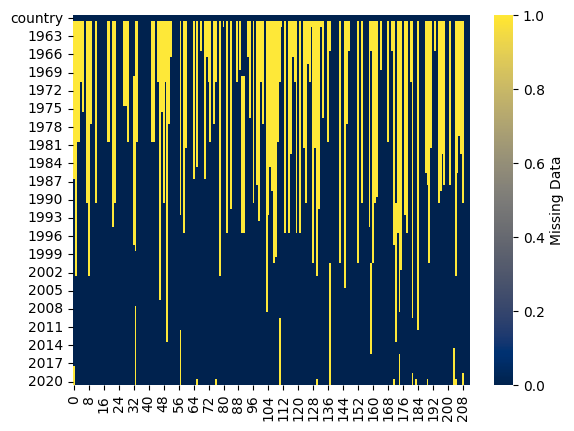

In [6]:
sns.heatmap(df.isna().transpose(),
            cmap="cividis",
            cbar_kws={'label': 'Missing Data'});

In [7]:
df.isna().sum()

country      0
1961       121
1962       117
1963       117
1964       117
          ... 
2016         6
2017         6
2018         7
2019         9
2020        16
Length: 61, dtype: int64

In [8]:
df['country'] = df.country.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   country  212 non-null    category
 1   1961     91 non-null     object  
 2   1962     95 non-null     object  
 3   1963     95 non-null     object  
 4   1964     95 non-null     object  
 5   1965     95 non-null     object  
 6   1966     101 non-null    object  
 7   1967     105 non-null    object  
 8   1968     106 non-null    object  
 9   1969     108 non-null    object  
 10  1970     105 non-null    object  
 11  1971     116 non-null    object  
 12  1972     116 non-null    object  
 13  1973     116 non-null    object  
 14  1974     116 non-null    float64 
 15  1975     118 non-null    object  
 16  1976     120 non-null    object  
 17  1977     122 non-null    object  
 18  1978     127 non-null    object  
 19  1979     127 non-null    float64 
 20  1980     128 non-null    object 

In [9]:
df.columns

Index(['country', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [ ]:
df.columns.rename(columns= {})

In [10]:
df.columns.astype(int)

TypeError: Cannot cast Index to dtype int64